### **Informacion: eda.ipynb**

Lo que vamos a hacer en este notebook es hacer una análisis exploratorio de datos **(EDA)** las transformaciones correspondientes a este análisis para crear un csv limpio a partir del archivo **MLA_100k.jsonlines**

El **objetivo final** es encontrar las columnas importantes **(features)** para predecir la **columna objetivo** que en este caso es la columna que tenga la condición de que un producto sea **nuevo o usado**

- Al csv lo vamos nombrar **cleaned_data.csv**
- Debemos encontrar las **features** más relevantes para predecir la **variable objetivo**
- Al final guardaremos el csv y trabajaremos con el en un notebook llamada **train.ipynb**

Importar librerías necesarias

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
import numpy as np

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format) # cambiar el formato de pandas

Cargar el archivo

In [15]:
file_path = '../data/MLA_100k.jsonlines'
df = pd.read_json(file_path, lines=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [32]:
df['condition'].unique()

array(['new', 'used'], dtype=object)

#### **Importante:**

Nos damos cuenta de que nuestra columna objetivo es **condition**, que es la que cuenta con la condición de si un producto es **nuevo o usado**

- **Lo siguiente** que debemos hacer es encontrar las **features**, es decir, las columnas que **ayudarán al modelo** a predecir de manera exacta o casi exacta esta condición
- Pero antes vamos a **realizar el EDA** que mencionamos anteriormente para ver que puede estar **fuera de lugar**

Aparentemente **no existen filas duplicadas**

In [33]:
df.isnull().sum()

seller_address                           0
warranty                             60896
sub_status                               0
condition                                0
seller_contact                       97781
deal_ids                                 0
base_price                               0
shipping                                 0
non_mercado_pago_payment_methods         0
seller_id                                0
variations                               0
location                                 0
site_id                                  0
listing_type_id                          0
price                                    0
attributes                               0
buying_mode                              0
tags                                     0
listing_source                           0
parent_item_id                       23011
coverage_areas                           0
category_id                              0
descriptions                             0
last_update

#### **Valores nulos:**

- **warranty**: 60,896 nulos
- **seller_contact**: 97,781 nulos
- **parent_item_id**: 23,011 nulos
- **official_store_id**: 99,182 nulos
- **differential_pricing**: 100,000 nulos
- **original_price**: 99,857 nulos
- **video_id**: 97,015 nulos
- **catalog_product_id**: 99,989 nulos
- **subtitle**: 100,000 nulos

Resto de columnas: **0 nulos**

- Se van a decidir **descartar** estas columnas para el **cleaned_data.csv** porque tienen **demasiados nulos**
- **No** vamos a crear una variable para **eliminar columnas** sino que vamos a tener una variable que contendrán las columnas elegidas **(features)**
- Estas **no serán las únicas columnas** que se van a **descartar**, también vamos a descartar otras que **no tengan mucha relevancia**, pero lo veremos más adelante

In [16]:
df['condition'].value_counts(normalize=True) * 100

condition
new    53.76
used   46.24
Name: proportion, dtype: float64

#### **Proporción de la columna condition:**

Vemos que **no hay mucha diferencia** entre los productos **usados y los nuevos**, es decir que se **venden** casi que en la **misma proporción**.

- **Nuevos** = 53.76%
- **Usados** = 46.24%

In [35]:
df.describe()

,base_price,seller_id,price,official_store_id,differential_pricing,original_price,catalog_product_id,subtitle,initial_quantity,sold_quantity,available_quantity,target
count,100000.00,100000.00,100000.00,818.00,0.00,143.00,11.00,0.00,100000.00,100000.00,100000.00,100000.00
mean,52524.23,84252693.24,52524.33,206.44,NaN,1593.34,3727643.18,NaN,35.09,2.40,34.84,0.54
std,8623127.16,54972571.99,8623127.16,128.25,NaN,2245.80,1884697.95,NaN,421.08,42.69,420.81,0.50
min,0.84,1304.00,0.84,1.00,NaN,120.00,94404.00,NaN,1.00,0.00,1.00,0.00
25%,90.00,39535905.50,90.00,84.00,NaN,449.00,3050701.50,NaN,1.00,0.00,1.00,0.00
50%,250.00,76310627.00,250.00,216.00,NaN,858.00,5093232.00,NaN,1.00,0.00,1.00,1.00
75%,800.00,132565910.00,800.00,312.75,NaN,1500.00,5103216.00,NaN,2.00,0.00,2.00,1.00
max,2222222222.00,194690579.00,2222222222.00,446.00,NaN,13999.00,5434513.00,NaN,9999.00,8676.00,9999.00,1.00


In [17]:
df['target']=df['condition'].map({'new':1,'used':0})

<Axes: >

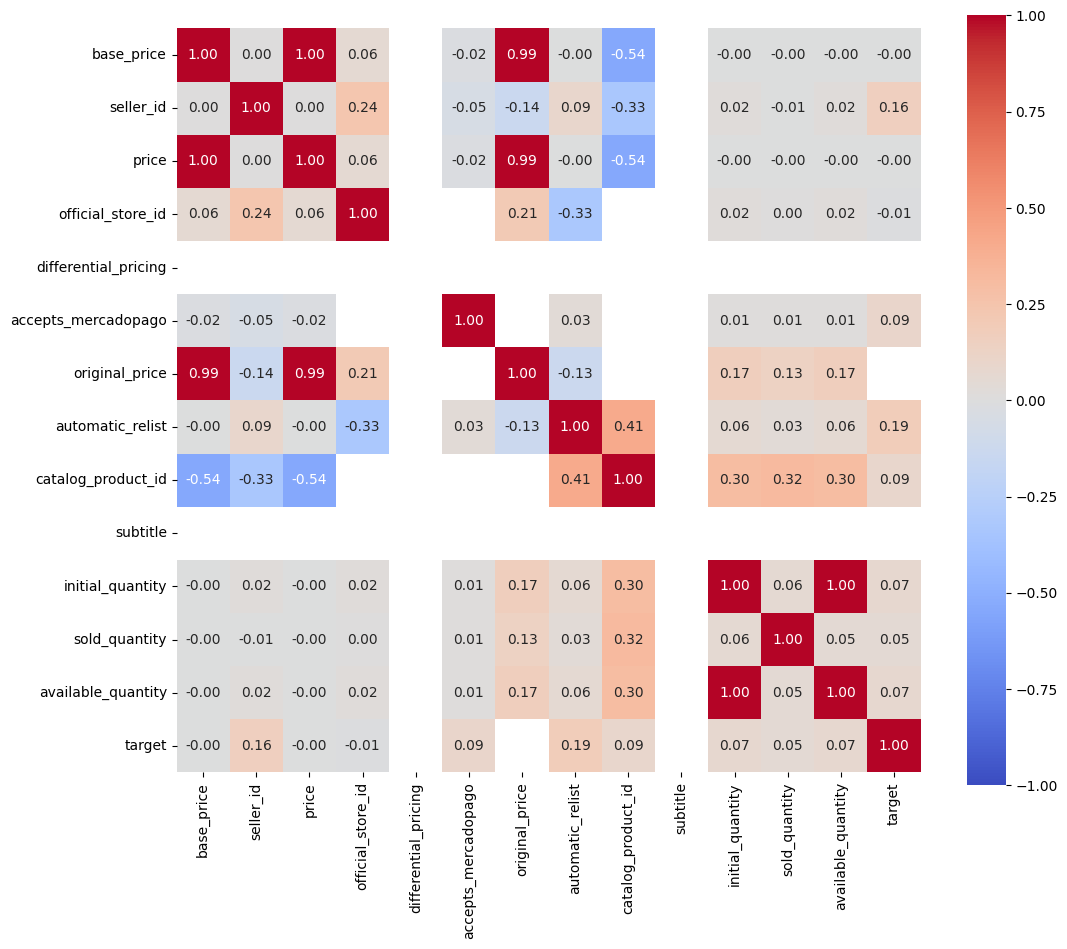

In [43]:
num=df.select_dtypes(include=['int64','float64','bool']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[num].corr(),vmin=-1,vmax=1,cmap='coolwarm',annot=True,fmt='.2f',square=True)

| Observación                                                                                                                                                               | Acción                                                                                                                              |
| ------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| **`base_price`, `price` y `original_price`** estan correlacionadas casi que igual (≈ 1.00).                                                                           | Mantener **una sola** (dejamos `price`) y eliminar las otras dos.                                     |
| **`seller_id`** apenas se relaciona con la mayoría de variables, pero muestra 0.16 con el objetivo.| Excluir por ahora.                                                               |
| **`automatic_relist`** presenta la mayor correlación con el target (≈ 0.19).                                                                                              | Conservarla.                                                                                                                        |
| **`initial_quantity`, `sold_quantity`, `available_quantity`** tienen correlaciones bajas pero diferentes entre sí.                                                        | Conservarlas; pueden ser útiles.                                                                  |
| Variables con valores nulos masivos o varianza \~0 (`differential_pricing`, `subtitle`, `catalog_product_id`, etc.).                                                      | Eliminar.                                                                                                                           |
| Correlaciones débiles (< 0.05) con el target en la mayoría de casos.                                                                                                      | No es suficiente para descartar así que utilizaremos más métodos para ver si las descartamos o las dejamos.

In [18]:
cols=['price','initial_quantity','sold_quantity','available_quantity',
      'automatic_relist','accepts_mercadopago',
      'listing_type_id','buying_mode','shipping','currency_id',
      'category_id','site_id','status','sub_status','condition']

df_sel=df[cols].copy()
for c in ['listing_type_id','buying_mode','shipping','currency_id',
          'category_id','site_id','status','sub_status']:
    print(c,df_sel[c].astype(str).nunique())


listing_type_id 7
buying_mode 3
shipping 40
currency_id 2
category_id 10907
site_id 1
status 4
sub_status 4


In [70]:
df_sel['sub_status'].astype(str).unique()

array(['[]', "['suspended']", "['expired']", "['deleted']"], dtype=object)

Vemos que **substatus solo tiene 4 valores** que hacen referencia como a si el producto fue eliminado, suspendido, expirado o que no ha sufrido cambios. Por lo que no me parece relevante así que mejor la **eliminamos**

In [82]:
df_sel['accepts_mercadopago'].astype(str).value_counts()

accepts_mercadopago
1    97781
0     2219
Name: count, dtype: int64

Viendo los valores únicos en mercado pago vemos que la mayoría es 1, por lo que no es muy relevante para productos nuevos o usados, pues considerando que la proporción de los productos nuevos y usados es casi la misma, no es muy relevante tener esta columna, e incluso podría confundir al modelo, debido a que ambos productos en su mayoría aceptan mercado pago.

In [50]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                100000 non-null  float64
 1   initial_quantity     100000 non-null  int64  
 2   sold_quantity        100000 non-null  int64  
 3   available_quantity   100000 non-null  int64  
 4   automatic_relist     100000 non-null  bool   
 5   accepts_mercadopago  100000 non-null  bool   
 6   listing_type_id      100000 non-null  object 
 7   buying_mode          100000 non-null  object 
 8   shipping             100000 non-null  object 
 9   currency_id          100000 non-null  object 
 10  category_id          100000 non-null  object 
 11  site_id              100000 non-null  object 
 12  status               100000 non-null  object 
 13  sub_status           100000 non-null  object 
 14  condition            100000 non-null  object 
dtypes: bool(2), float6

In [51]:
df_sel.head()

,price,initial_quantity,sold_quantity,available_quantity,automatic_relist,accepts_mercadopago,listing_type_id,buying_mode,shipping,currency_id,category_id,site_id,status,sub_status,condition
0,80.00,1,0,1,False,True,bronze,buy_it_now,"{'local_pick_up': True, 'methods': [], 'tags':...",ARS,MLA126406,MLA,active,[],new
1,2650.00,1,0,1,False,True,silver,buy_it_now,"{'local_pick_up': True, 'methods': [], 'tags':...",ARS,MLA10267,MLA,active,[],used
2,60.00,1,0,1,False,True,bronze,buy_it_now,"{'local_pick_up': True, 'methods': [], 'tags':...",ARS,MLA1227,MLA,active,[],used
3,580.00,1,0,1,False,True,silver,buy_it_now,"{'local_pick_up': True, 'methods': [], 'tags':...",ARS,MLA86345,MLA,active,[],new
4,30.00,1,0,1,False,True,bronze,buy_it_now,"{'local_pick_up': True, 'methods': [], 'tags':...",ARS,MLA41287,MLA,active,[],used


- Vemos que shipping es de tipo dict, eso puede generar problemas a la hora de buscar la columna que mas aporta al modelo debido a que contiene más de un solo valor, por lo que la vamos a dividir en otras columnas.
- site_id solo tiene un valor por lo que la vamos a eliminar
- category_id tiene demasiadas categorías, así que la vamos a borrar
- Los booleanos (automatic_relist, accepts_mercadopago) los vamos a tratar como númericos (0 y 1) para que el modelo tenga un valor que represente algo

In [19]:
cols=['price','initial_quantity','sold_quantity','available_quantity',
      'automatic_relist','listing_type_id','buying_mode','shipping','currency_id',
      'status','condition']
df_sel=df[cols].copy()

In [20]:
df_sel['shipping_local_pick_up']=df_sel['shipping'].apply(lambda x:isinstance(x,dict) and x.get('local_pick_up',False))
df_sel['shipping_free']=df_sel['shipping'].apply(lambda x:isinstance(x,dict) and 'free_shipping' in x.get('tags',[]))
df_sel=df_sel.drop(['shipping'],axis=1)

df_sel[['automatic_relist','shipping_local_pick_up','shipping_free']]=\
    df_sel[['automatic_relist','shipping_local_pick_up','shipping_free']].astype(int)

df_sel=df_sel.drop(['site_id'],errors='ignore',axis=1)

In [114]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   100000 non-null  float64
 1   initial_quantity        100000 non-null  int64  
 2   sold_quantity           100000 non-null  int64  
 3   available_quantity      100000 non-null  int64  
 4   automatic_relist        100000 non-null  int64  
 5   listing_type_id         100000 non-null  object 
 6   buying_mode             100000 non-null  object 
 7   currency_id             100000 non-null  object 
 8   status                  100000 non-null  object 
 9   condition               100000 non-null  object 
 10  shipping_local_pick_up  100000 non-null  int64  
 11  shipping_free           100000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 9.2+ MB


df_sel.info() confirma:
+ 1 columna float (price), 6 int, 5 object.
+ 0 valores faltantes.
+ Tamaño moderado (9.2 MB).

Esto valida que los pasos de limpieza funcionaron y la muestra está lista para el preprocesado.

In [95]:
df_sel.head()

,price,initial_quantity,sold_quantity,available_quantity,automatic_relist,listing_type_id,buying_mode,currency_id,status,condition,shipping_local_pick_up,shipping_free
0,80.00,1,0,1,0,bronze,buy_it_now,ARS,active,new,1,0
1,2650.00,1,0,1,0,silver,buy_it_now,ARS,active,used,1,0
2,60.00,1,0,1,0,bronze,buy_it_now,ARS,active,used,1,0
3,580.00,1,0,1,0,silver,buy_it_now,ARS,active,new,1,0
4,30.00,1,0,1,0,bronze,buy_it_now,ARS,active,used,1,0


In [24]:
cols_num=['price','initial_quantity','sold_quantity','available_quantity',
          'automatic_relist','shipping_local_pick_up','shipping_free']
cols_cat=['listing_type_id','buying_mode','currency_id','status']

df_proc=df_sel[cols_num+cols_cat+['condition']].dropna()
df_proc[cols_cat]=df_proc[cols_cat].astype(str)
df_proc['condition']=LabelEncoder().fit_transform(df_proc['condition'])

pre=ColumnTransformer([('num','passthrough',cols_num),
                       ('cat',OneHotEncoder(handle_unknown='ignore'),cols_cat)])

X=pre.fit_transform(df_proc.drop('condition',axis=1))
y=df_proc['condition']
names=pre.get_feature_names_out()

skb=SelectKBest(f_classif,k='all').fit(X,y)
mi=mutual_info_classif(X,y,random_state=42)

rank=pd.DataFrame({'feature':names,'f_score':skb.scores_,'mi_score':mi}) \
         .sort_values('f_score',ascending=False)


/home/edwards/Documentos/university/etl/ml_exercise/venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/edwards/Documentos/university/etl/ml_exercise/venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Separamos listas `cols_num` (7 numéricas) y `cols_cat` (4 categóricas) para el pipeline.

Convertimos categóricas a `str` para evitar errores con el codificador.

Etiquetamos la variable objetivo: `condition` → 1 (nuevo) / 0 (usado) usando `LabelEncoder`.

### Por qué
- `ColumnTransformer` necesita saber qué columnas pasan sin cambio y cuáles van a one-hot.
- Los estimadores de scikit-learn requieren la `y` numérica.

In [25]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   100000 non-null  float64
 1   initial_quantity        100000 non-null  int64  
 2   sold_quantity           100000 non-null  int64  
 3   available_quantity      100000 non-null  int64  
 4   automatic_relist        100000 non-null  int64  
 5   shipping_local_pick_up  100000 non-null  int64  
 6   shipping_free           100000 non-null  int64  
 7   listing_type_id         100000 non-null  object 
 8   buying_mode             100000 non-null  object 
 9   currency_id             100000 non-null  object 
 10  status                  100000 non-null  object 
 11  condition               100000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 9.2+ MB


In [26]:
df_proc.head()

,price,initial_quantity,sold_quantity,available_quantity,automatic_relist,shipping_local_pick_up,shipping_free,listing_type_id,buying_mode,currency_id,status,condition
0,80.00,1,0,1,0,1,0,bronze,buy_it_now,ARS,active,0
1,2650.00,1,0,1,0,1,0,silver,buy_it_now,ARS,active,1
2,60.00,1,0,1,0,1,0,bronze,buy_it_now,ARS,active,1
3,580.00,1,0,1,0,1,0,silver,buy_it_now,ARS,active,0
4,30.00,1,0,1,0,1,0,bronze,buy_it_now,ARS,active,1


In [27]:
if df_proc['currency_id'].nunique()==1 or (df_proc['currency_id'].value_counts(normalize=True).iloc[0]>0.95):
    df_proc=df_proc.drop(['currency_id'],axis=1)

if df_proc['status'].value_counts(normalize=True).iloc[0]>0.95:
    df_proc=df_proc.drop(['status'],axis=1)


Detectamos que `currency_id` y `status` están dominadas por un único valor (>95 %).

Las suprimimos porque su baja varianza aporta ruido al modelo y puede generar columnas dispersas inútiles tras one-hot.

### Resultado
`df_proc` pasa de 12 a 10 columnas.

In [30]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   100000 non-null  float64
 1   initial_quantity        100000 non-null  int64  
 2   sold_quantity           100000 non-null  int64  
 3   available_quantity      100000 non-null  int64  
 4   automatic_relist        100000 non-null  int64  
 5   shipping_local_pick_up  100000 non-null  int64  
 6   shipping_free           100000 non-null  int64  
 7   listing_type_id         100000 non-null  object 
 8   buying_mode             100000 non-null  object 
 9   condition               100000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 7.6+ MB


In [31]:
df_proc.head()

,price,initial_quantity,sold_quantity,available_quantity,automatic_relist,shipping_local_pick_up,shipping_free,listing_type_id,buying_mode,condition
0,80.00,1,0,1,0,1,0,bronze,buy_it_now,0
1,2650.00,1,0,1,0,1,0,silver,buy_it_now,1
2,60.00,1,0,1,0,1,0,bronze,buy_it_now,1
3,580.00,1,0,1,0,1,0,silver,buy_it_now,0
4,30.00,1,0,1,0,1,0,bronze,buy_it_now,1


In [40]:
cat=['listing_type_id','buying_mode']
num=['price','initial_quantity','sold_quantity','available_quantity',
     'automatic_relist','shipping_local_pick_up','shipping_free','condition']

df_proc[cat]=df_proc[cat].astype(str)

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

enc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc_df=pd.DataFrame(enc.fit_transform(df_proc[cat]),
                    columns=enc.get_feature_names_out(cat),
                    index=df_proc.index)

df_encoded=pd.concat([df_proc[num],enc_df],axis=1)


In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   price                         100000 non-null  float64
 1   initial_quantity              100000 non-null  int64  
 2   sold_quantity                 100000 non-null  int64  
 3   available_quantity            100000 non-null  int64  
 4   automatic_relist              100000 non-null  int64  
 5   shipping_local_pick_up        100000 non-null  int64  
 6   shipping_free                 100000 non-null  int64  
 7   condition                     100000 non-null  int64  
 8   listing_type_id_bronze        100000 non-null  float64
 9   listing_type_id_free          100000 non-null  float64
 10  listing_type_id_gold          100000 non-null  float64
 11  listing_type_id_gold_premium  100000 non-null  float64
 12  listing_type_id_gold_pro      100000 non-null

In [43]:
df_encoded.head()

,price,initial_quantity,sold_quantity,available_quantity,automatic_relist,shipping_local_pick_up,shipping_free,condition,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,buying_mode_classified
0,80.00,1,0,1,0,1,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,2650.00,1,0,1,0,1,0,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,60.00,1,0,1,0,1,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,580.00,1,0,1,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,30.00,1,0,1,0,1,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [45]:
if 'condition' not in df_encoded.columns:
    df_encoded['condition']=df_proc['condition']
if df_encoded['condition'].dtype=='object':
    df_encoded['condition']=(df_encoded['condition']=='new').astype(int)


In [46]:
df_encoded.to_csv('../data/cleaned_data.csv',index=False)

Definimos `cat = ['listing_type_id', 'buying_mode']` y `num = [...]`.

Codificamos las dos categóricas con `OneHotEncoder(sparse_output=False)` → 11 columnas binarias nuevas.

Concatenamos con las 7 numéricas + `condition` para formar `df_encoded` con 18 columnas.

### Cambio de nombre
- `df_proc` → intermedio con columnas crudas.
- `df_encoded` → versión lista para modelar (numéricas + dummies).

### Revisión
`df_encoded.info()` confirma:
- 11 `float` (dummies) + 7 `int` (numéricas).
- Sin nulos.

Guardamos en `../data/cleaned_data.csv` para que `train.ipynb` consuma los datos.